# Аппроксимация функции

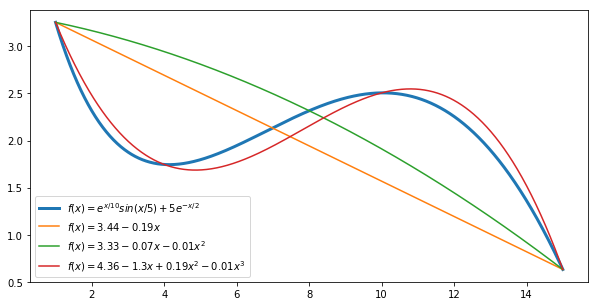

In [4]:
import numpy
import math
import pylab
def current_f(x):
        return math.sin(x / 5) * math.exp(x / 10) + 5 * math.exp(- x / 2)
def plot_all_fn(f, all_x):
    def fn(x, w):
        result = 0
        for i in range(len(w)):
            result += w[i] * x ** i
        return result
    def solve(x, f):
        def get_A(x):
            result = []
            n = len(x)
            for i in range(n):
                l = []
                for j in range(n):
                    l.append(x[i] ** j)
                result.append(l)
            return numpy.array(result)
        b = numpy.array(list(map(f, x)))
        A = get_A(x)
        return numpy.linalg.solve(A, b)
    def get_caption(w):
        def get_w_with_sign(wi, round_index):
            if wi > 0:
                return " + " + str(round(wi, round_index))
            else:
                return " " + str(round(wi, round_index))
        round_index = 2
        n = len(w)
        result = "$f(x) = "
        s_res = []
        if n > 0:
            s_res.append(str(round(w[0], round_index)))
        if n > 1:
            s_res.append(get_w_with_sign(w[1], round_index) + "x")
        for i in range(2, n):
            s_res.append(get_w_with_sign(w[i], round_index) + "x^{" + str(i) + "}")
        result += "".join(s_res) + "$"
        return result
    def ext_x(all_x, fun):
        return fun([fun(x) for x in all_x])
    dx = 0.01
    xlist = numpy.arange(ext_x(all_x, min), ext_x(all_x, max) + dx, dx)
    ylist = [f(x) for x in xlist]
    pylab.figure(figsize=(10,5))
    pylab.plot(xlist, ylist, label = "$f(x) = e ^ {x / 10}sin(x/5) + 5e ^ {-x / 2}$", linewidth=3)
    for x in all_x:
        w = solve(x, f)
        fnlist = [fn(x, w) for x in xlist]
        pylab.plot(xlist, fnlist, label = get_caption(w))
    pylab.legend(loc = 'lower left')
plot_all_fn(current_f, [[1, 15], [1, 8, 15], [1, 4, 10, 15]])